In [1]:
import cPickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('multiband_results.pkl') as f:
    data = cPickle.load(f)

In [3]:
single, multi = data

In [42]:
bands = ['theta', 'alpha', 'low beta', 'high beta', 'gamma']
band_abbreviations = ['t', 'a', 'b', 'hb', 'g']
chance = np.array([0.020769250392913819,
                   0.025316476821899414,
                   0.020309484004974364,
                   0.01111111044883728])
colors = ['black', 'gray', 'pink', 'red']
subjects = ['ec2', 'ec9', 'gp31', 'gp33']
n_train = [2052, 1247, 4173, 1152]

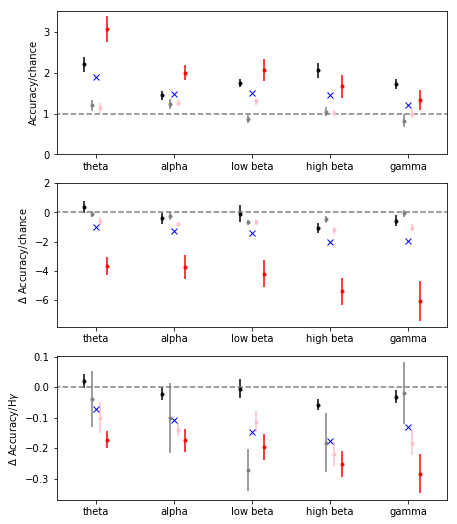

In [46]:
f, (ax0, ax1, ax2) = plt.subplots(3, figsize=(7, 9))
for ii, ba in enumerate(band_abbreviations):
    for jj, (col, ch) in enumerate(zip(colors, chance)):
        x = ii + .1 *(jj-1.5)
        y = single[ba][jj, 2, 0]/ch
        ystd = single[ba][jj, 2, 1]/ch / np.sqrt(10)
        ax0.errorbar(x, y, yerr=ystd, fmt='.', c=col)
        y = (multi[ba][jj, 2, 0]-single['hg'][jj, 2, 0])/ch
        ystd = (multi[ba][jj, 2, 1])/ch / np.sqrt(10)
        ax1.errorbar(x, y, yerr=ystd, fmt='.', c=col)
        y = (multi[ba][jj, 2, 0]-single['hg'][jj, 2, 0])/single['hg'][jj, 2, 0]
        ystd = (multi[ba][jj, 2, 1])/single['hg'][jj, 2, 0] / np.sqrt(10)
        ax2.errorbar(x, y, yerr=ystd, fmt='.', c=col)
    ax0.plot([ii], np.mean(single[ba][:, 2, 0]/chance), 'bx')
    ax1.plot([ii], np.mean((multi[ba][:, 2, 0]-single['hg'][:, 2, 0])/chance), 'bx')
    ax2.plot([ii], np.mean((multi[ba][:, 2, 0]-single['hg'][:, 2, 0])/single['hg'][:, 2, 0]), 'bx')
for ax in [ax0, ax1, ax2]:
    ax.set_xticks(np.arange(len(band_abbreviations)))
    ax.set_xticklabels(bands)
    ax.set_xlim(-.5, 4.5)
ax0.set_ylim(0, None)
ax1.set_ylim(None, 2)
ax0.set_ylabel('Accuracy/chance')
ax1.set_ylabel(r'$\Delta$ Accuracy/chance')
ax2.set_ylabel(r'$\Delta$ Accuracy/H$\gamma$')
ax0.plot([-10, 10], [1, 1], '--', c='gray')
ax1.plot([-10, 10], [0, 0], '--', c='gray')
ax2.plot([-10, 10], [0, 0], '--', c='gray')
plt.savefig('/Users/jesse/Downloads/multiband.pdf')
plt.show()

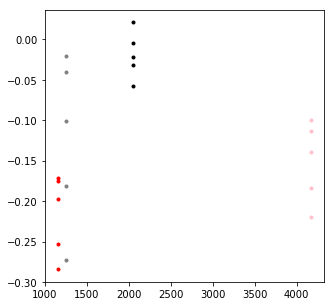

In [44]:
f, (ax) = plt.subplots(1, figsize=(5, 5))
for ii, ba in enumerate(band_abbreviations):
    for jj, (col, ch) in enumerate(zip(colors, chance)):
        x = n_train[jj]
        y = (multi[ba][jj, 2, 0]-single['hg'][jj, 2, 0])/single['hg'][jj, 2, 0]
        ystd = (multi[ba][jj, 2, 1])/single['hg'][jj, 2, 0] / np.sqrt(10)
        ax.plot(x, y, '.', c=col)
plt.show()